<a href="https://colab.research.google.com/github/Parishri07/Classification-algorithm-models/blob/main/Email_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/email_classification.csv')

In [5]:
df

,email,label
0,Upgrade to our premium plan for exclusive acce...,ham
1,Happy holidays from our team! Wishing you joy ...,ham
2,We're hiring! Check out our career opportuniti...,ham
3,Your Amazon account has been locked. Click her...,spam
4,Your opinion matters! Take our survey and help...,ham
...,...,...
174,We're pleased to inform you that your refund h...,ham
175,Get rich quick! Invest in our revolutionary ne...,spam
176,Your free trial period is ending soon. Upgrade...,ham
177,Your order is on its way! Track your shipment ...,ham


In [6]:
df.describe()

,email,label
count,179,179
unique,150,2
top,You've been selected for a free trial of our p...,ham
freq,4,100


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   179 non-null    object
 1   label   179 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


In [8]:
df.isnull().sum()

email    0
label    0
dtype: int64

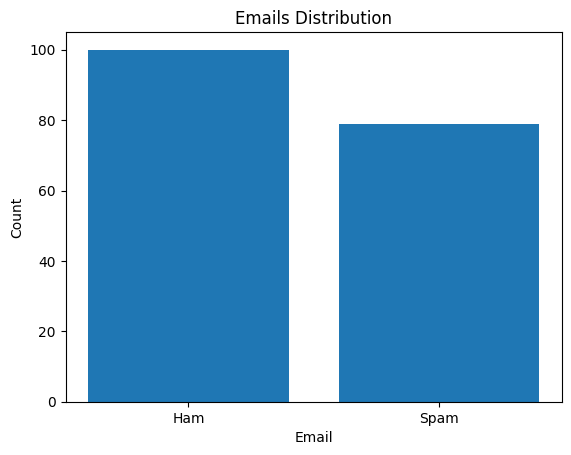

In [9]:
import matplotlib.pyplot as plt
email_counts = [0, 0]

for sentiment in df['label']:
  if sentiment == 'ham':
    email_counts[0] += 1
  elif sentiment == 'spam':
    email_counts[1] += 1

email_labels = ["Ham", "Spam"]
email_values = email_counts

plt.bar(email_labels, email_values)
plt.xlabel("Email")
plt.ylabel("Count")
plt.title("Emails Distribution")
plt.show()

Preprocessing

Converting to Lowercase

In [10]:
df['email'] = df['email'].apply(lambda x: x.lower())
df

,email,label
0,upgrade to our premium plan for exclusive acce...,ham
1,happy holidays from our team! wishing you joy ...,ham
2,we're hiring! check out our career opportuniti...,ham
3,your amazon account has been locked. click her...,spam
4,your opinion matters! take our survey and help...,ham
...,...,...
174,we're pleased to inform you that your refund h...,ham
175,get rich quick! invest in our revolutionary ne...,spam
176,your free trial period is ending soon. upgrade...,ham
177,your order is on its way! track your shipment ...,ham


Removing stop words

In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
stop_words = stopwords.words('english')

def remove_stopwords(text):
  words = text.lower().split()  # Tokenize and lowercase
  filtered_words = [word for word in words if word not in stop_words]
  return ' '.join(filtered_words)

df['email'] = df['email'].apply(remove_stopwords)

In [13]:
df

,email,label
0,upgrade premium plan exclusive access premium ...,ham
1,happy holidays team! wishing joy prosperity se...,ham
2,we're hiring! check career opportunities join ...,ham
3,amazon account locked. click verify account in...,spam
4,opinion matters! take survey help us enhance e...,ham
...,...,...
174,we're pleased inform refund processed successf...,ham
175,get rich quick! invest revolutionary new schem...,spam
176,free trial period ending soon. upgrade continu...,ham
177,order way! track shipment real-time updates.,ham


Removing numbers

In [14]:
pattern = r"\d+"
df.loc[:,'email'] = df.loc[:,'email'].str.replace(pattern, '', regex=True)
df['email']

0      upgrade premium plan exclusive access premium ...
1      happy holidays team! wishing joy prosperity se...
2      we're hiring! check career opportunities join ...
3      amazon account locked. click verify account in...
4      opinion matters! take survey help us enhance e...
                             ...                        
174    we're pleased inform refund processed successf...
175    get rich quick! invest revolutionary new schem...
176    free trial period ending soon. upgrade continu...
177         order way! track shipment real-time updates.
178    limited-time offer! get % purchases today only...
Name: email, Length: 179, dtype: object

Removing special characters

In [15]:
df.loc[:,'email'] = df.loc[:,'email'].str.replace(r"[^\w\s]", '', regex=True)
df.loc[:,'email'] = df.loc[:,'email'].str.strip()
df['email']

0      upgrade premium plan exclusive access premium ...
1      happy holidays team wishing joy prosperity season
2      were hiring check career opportunities join dy...
3      amazon account locked click verify account inf...
4      opinion matters take survey help us enhance ex...
                             ...                        
174    were pleased inform refund processed successfully
175    get rich quick invest revolutionary new scheme...
176    free trial period ending soon upgrade continue...
177            order way track shipment realtime updates
178    limitedtime offer get  purchases today only mi...
Name: email, Length: 179, dtype: object

Removing whitespaces

In [18]:
df['email'] = df['email'].apply(lambda text: text.strip())
df

,email,label
0,upgrade premium plan exclusive access premium ...,ham
1,happy holidays team wishing joy prosperity season,ham
2,were hiring check career opportunities join dy...,ham
3,amazon account locked click verify account inf...,spam
4,opinion matters take survey help us enhance ex...,ham
...,...,...
174,were pleased inform refund processed successfully,ham
175,get rich quick invest revolutionary new scheme...,spam
176,free trial period ending soon upgrade continue...,ham
177,order way track shipment realtime updates,ham


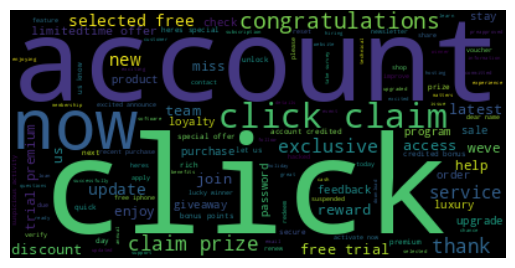

In [26]:
from wordcloud import WordCloud

text = df['email'].str.cat(sep=' ')
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Feature Engineering

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_features = vectorizer.fit_transform(df['email'])
tfidf_features

<179x454 sparse matrix of type '<class 'numpy.float64'>'
	with 1305 stored elements in Compressed Sparse Row format>

Split into dependent and independent features

In [23]:
X = df.iloc[:,:1]
X

,email
0,upgrade premium plan exclusive access premium ...
1,happy holidays team wishing joy prosperity season
2,were hiring check career opportunities join dy...
3,amazon account locked click verify account inf...
4,opinion matters take survey help us enhance ex...
...,...
174,were pleased inform refund processed successfully
175,get rich quick invest revolutionary new scheme...
176,free trial period ending soon upgrade continue...
177,order way track shipment realtime updates


In [24]:
y = df.iloc[:,-1]
y

0       ham
1       ham
2       ham
3      spam
4       ham
       ... 
174     ham
175    spam
176     ham
177     ham
178    spam
Name: label, Length: 179, dtype: object

Train test split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, y, test_size=0.2, random_state=42)

In [26]:
X_train

<143x454 sparse matrix of type '<class 'numpy.float64'>'
	with 1055 stored elements in Compressed Sparse Row format>

In [27]:
y_train

158     ham
31     spam
12     spam
51     spam
41      ham
       ... 
71     spam
106     ham
14      ham
92     spam
102     ham
Name: label, Length: 143, dtype: object

Cross validation

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Model Parameters:", best_model.get_params())
print("Best Cross-Validation Accuracy:", best_score)

Best Model Parameters: {'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}
Best Cross-Validation Accuracy: 0.9431034482758621


Model Training

In [34]:
best_model

MultinomialNB()

In [35]:
y_pred = best_model.predict(X_test)
y_pred

array(['spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'ham', 'spam',
       'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam',
       'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
       'spam'], dtype='<U4')

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9722222222222222
Precision: 1.0
Recall: 0.9545454545454546
F1-score: 0.9767441860465117


Prediction with new data

In [38]:
new_email=input("Enter a new email: ")

new_email_features = vectorizer.transform([new_email])
new_email_pred = best_model.predict(new_email_features)[0]

if new_email_pred == "ham":
  print("New email is classified as ham")
else:
  print("New email is classified as spam")

Enter a new email: Flipkart sale is live
New email is classified as ham
